In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Documentation
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [6]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [7]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
X_train.shape

(11610, 8)

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

In [18]:
model_history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 700us/step - loss: 0.3949 - mae: 0.4489 - val_loss: 0.3695 - val_mae: 0.4322
Epoch 2/20
363/363 [==============================] - 0s 637us/step - loss: 0.3922 - mae: 0.4469 - val_loss: 0.3698 - val_mae: 0.4350
Epoch 3/20
363/363 [==============================] - 0s 625us/step - loss: 0.3898 - mae: 0.4461 - val_loss: 0.3647 - val_mae: 0.4285
Epoch 4/20
363/363 [==============================] - 0s 631us/step - loss: 0.3873 - mae: 0.4439 - val_loss: 0.3632 - val_mae: 0.4309
Epoch 5/20
363/363 [==============================] - 0s 637us/step - loss: 0.3851 - mae: 0.4426 - val_loss: 0.3607 - val_mae: 0.4276
Epoch 6/20
363/363 [==============================] - 0s 689us/step - loss: 0.3829 - mae: 0.4415 - val_loss: 0.3586 - val_mae: 0.4247
Epoch 7/20
363/363 [==============================] - 0s 714us/step - loss: 0.3808 - mae: 0.4398 - val_loss: 0.3563 - val_mae: 0.4240
Epoch 8/20
363/363 [==============================] - 0s 642us

In [19]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 420us/step - loss: 0.3596 - mae: 0.4269


In [20]:
model_history.history

{'loss': [0.3948921859264374,
  0.3922426700592041,
  0.38980168104171753,
  0.3872992992401123,
  0.3851175904273987,
  0.3828714191913605,
  0.3807542324066162,
  0.3787873089313507,
  0.37684252858161926,
  0.37485161423683167,
  0.3732492923736572,
  0.37154120206832886,
  0.3699617087841034,
  0.36844807863235474,
  0.3671077489852905,
  0.36586400866508484,
  0.364767462015152,
  0.36347660422325134,
  0.36217090487480164,
  0.3612859845161438],
 'mae': [0.448872447013855,
  0.4469223618507385,
  0.4460664689540863,
  0.4439034163951874,
  0.4425695538520813,
  0.4414599537849426,
  0.4398252069950104,
  0.43846991658210754,
  0.43753182888031006,
  0.4359447658061981,
  0.43472516536712646,
  0.43356847763061523,
  0.43265366554260254,
  0.43151575326919556,
  0.43066665530204773,
  0.43046438694000244,
  0.42939263582229614,
  0.42837896943092346,
  0.42722663283348083,
  0.42688435316085815],
 'val_loss': [0.3695237636566162,
  0.3698018789291382,
  0.3646637797355652,
  0.363

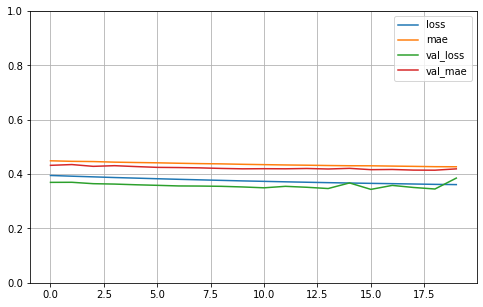

In [21]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [22]:
X_new = X_test[:3]

In [23]:
y_pred = model.predict(X_new)
print (y_pred)
print (y_test[:3])

[[0.6071852]
 [1.8601747]
 [3.7925048]]
[0.477   0.458   5.00001]


In [24]:
del model

In [26]:
keras.backend.clear_session()

In [29]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [30]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_3[0][0]         

In [32]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [37]:
model_history = model.fit(X_train, y_train, epochs=40,validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 0s 711us/step - loss: 0.3635 - mae: 0.4289 - val_loss: 0.3438 - val_mae: 0.4145
Epoch 2/40
363/363 [==============================] - 0s 637us/step - loss: 0.3625 - mae: 0.4280 - val_loss: 0.4691 - val_mae: 0.4254
Epoch 3/40
363/363 [==============================] - 0s 642us/step - loss: 0.3624 - mae: 0.4282 - val_loss: 0.3512 - val_mae: 0.4145
Epoch 4/40
363/363 [==============================] - 0s 639us/step - loss: 0.3603 - mae: 0.4267 - val_loss: 0.3525 - val_mae: 0.4183
Epoch 5/40
363/363 [==============================] - 0s 634us/step - loss: 0.3603 - mae: 0.4265 - val_loss: 0.3347 - val_mae: 0.4130
Epoch 6/40
363/363 [==============================] - 0s 642us/step - loss: 0.3585 - mae: 0.4259 - val_loss: 0.4665 - val_mae: 0.4201
Epoch 7/40
363/363 [==============================] - 0s 642us/step - loss: 0.3596 - mae: 0.4252 - val_loss: 0.3485 - val_mae: 0.4148
Epoch 8/40
363/363 [==============================] - 0s 639us

In [38]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 401us/step - loss: 0.3393 - mae: 0.4091


In [35]:
model_history.history

{'loss': [1.8870816230773926,
  0.6985266804695129,
  0.6362205147743225,
  0.5830869078636169,
  0.5506728887557983,
  0.5219724178314209,
  0.5008842349052429,
  0.4828588366508484,
  0.46753668785095215,
  0.4557570815086365,
  0.4457080364227295,
  0.4373014569282532,
  0.43016543984413147,
  0.4241107404232025,
  0.41865482926368713,
  0.4140312969684601,
  0.4096393585205078,
  0.4063641428947449,
  0.401676207780838,
  0.3986748158931732,
  0.3963574171066284,
  0.392816960811615,
  0.3907949924468994,
  0.38828495144844055,
  0.38677337765693665,
  0.38322705030441284,
  0.38248151540756226,
  0.3804790675640106,
  0.38014087080955505,
  0.37710049748420715,
  0.3786315619945526,
  0.37413617968559265,
  0.374658465385437,
  0.3716024160385132,
  0.3703598082065582,
  0.36849135160446167,
  0.36766812205314636,
  0.36696064472198486,
  0.36541205644607544,
  0.36433145403862],
 'mae': [0.9733277559280396,
  0.6180993914604187,
  0.5825698971748352,
  0.556715726852417,
  0.5389

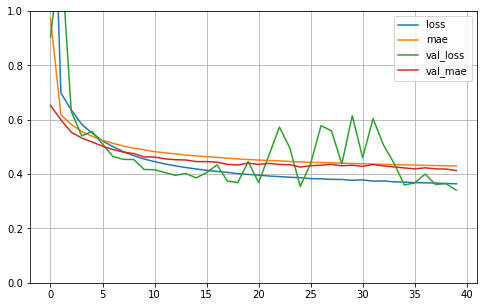

In [36]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

# Saving and Restoring

In [39]:
model.save("my_Func_model.h5")

In [40]:
%pwd

'C:\\Users\\Usuario'

In [41]:
del model

In [42]:
keras.backend.clear_session()

In [43]:
model = keras.models.load_model("my_Func_model.h5")

In [44]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           930         dense_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_3[0][0]         

In [45]:
y_pred = model.predict(X_new)
print (y_pred)

[[0.73897976]
 [1.6413093 ]
 [4.1943116 ]]


# Using Callbacks during Training

In [46]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [48]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [49]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [50]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 843us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 638us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 634us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 607us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 625us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 606us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 603us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 598us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 613us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
363/363 [==============================] - 0s 625us/step - loss: 0.447

In [51]:
del model
keras.backend.clear_session()

In [53]:
model = keras.models.load_model("my_Func_model.h5")

In [54]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 414us/step - loss: 0.3393 - mean_absolute_error: 0.4091


# Best Model Only

In [55]:
del model
keras.backend.clear_session()

In [56]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [57]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [58]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [59]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 835us/step - loss: 1.4581 - val_loss: 0.7883
Epoch 2/10
363/363 [==============================] - 0s 648us/step - loss: 0.7368 - val_loss: 0.7306
Epoch 3/10
363/363 [==============================] - 0s 635us/step - loss: 0.6516 - val_loss: 0.6501
Epoch 4/10
363/363 [==============================] - 0s 633us/step - loss: 0.5951 - val_loss: 0.5551
Epoch 5/10
363/363 [==============================] - 0s 620us/step - loss: 0.5536 - val_loss: 0.5025
Epoch 6/10
363/363 [==============================] - 0s 620us/step - loss: 0.5199 - val_loss: 0.4728
Epoch 7/10
363/363 [==============================] - 0s 631us/step - loss: 0.4940 - val_loss: 0.4497
Epoch 8/10
363/363 [==============================] - 0s 730us/step - loss: 0.4730 - val_loss: 0.4359
Epoch 9/10
363/363 [==============================] - 0s 648us/step - loss: 0.4563 - val_loss: 0.4267
Epoch 10/10
363/363 [==============================] - 0s 617us/step - loss: 0.443

In [60]:
model = keras.models.load_model("Best_Model.h5")
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 407us/step - loss: 0.4366
